In [18]:
%matplotlib inline
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, Subset, Dataset
from sklearn.model_selection import train_test_split, KFold
from PIL import Image
import shutil
import pandas
from torchvision.io import read_image

cudnn.benchmark = True
plt.ion()   # interactive mode
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [19]:
def test_model(model, dataset, labels):
    since = time.time()

    # Each epoch has a training and validation phase
    #model.eval()

    running_corrects = 0

    # Iterate over data.
    for idx in range(len(dataset)):
        
        image = Image.open(dataset[idx]).resize((320, 320))
        plt.figure()
        plt.imshow(image)
        plt.show()
        #label = labels[idx]
        #if not isinstance(label, list):
        #    label = [label]
        # zero the parameter gradients
        #optimizer.zero_grad()

        # forward
        output = model(image, size=320)
        print(output.pandas().xyxy[0].sort_values('xmin'))
        predictions = output.pandas().xyxy[0].sort_values('xmin').loc[:, "class"].tolist()
        predictions_char_arr = [str(prediction) if prediction != 10 else 'u' for prediction in predictions]
        predictions_str = "".join(predictions_char_arr)
        print("Number of predictions: ", len(predictions_str), "Prediction: ", predictions_str)
        #running_corrects += (predictions == label)
        #output.print()
        #_, preds = torch.max(outputs, 1)
        #print(preds)
        #loss = criterion(output, label)

        # statistics
        #running_loss += loss.item() * inputs.size(0)
        #running_corrects += torch.sum(preds == labels.data)

    #loss = running_loss / dataset_test_size
    acc = running_corrects / len(dataset)

    print(f'Acc: {acc:.4f}')

    time_elapsed = time.time() - since
    print(f'Testing complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    return model

In [24]:
preceding_path = "Multi2"
dataset = [os.path.join(preceding_path, image) for image in os.listdir(preceding_path)]
#dataset = ['augmented_283.jpg']
labels = [[7, 0], [0, 4], [4, 1], [5, 6], [3, 5], [2, 3], [9, 8], [2, 3], [3, 0], [5, 6], [9, 8], [8, 7], [1, 4]]
model_ft = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\justin.rossiter/.cache\torch\hub\master.zip
requirements: YOLOv5 requirements "gitpython" "tqdm>=4.64.0" not found, attempting AutoUpdate...
requirements:  Command 'pip install "gitpython" "tqdm>=4.64.0"  ' returned non-zero exit status 1.
YOLOv5  2022-12-3 Python-3.8.8 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients
Adding AutoShape... 


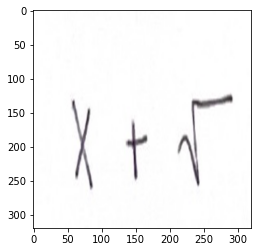

      xmin  ymin        xmax        ymax  confidence  class name
0  2.45462   0.0  317.230835  311.813751    0.391789      0    x
Number of predictions:  1 Prediction:  0


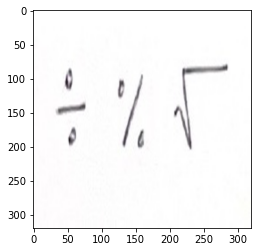

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Number of predictions:  0 Prediction:  


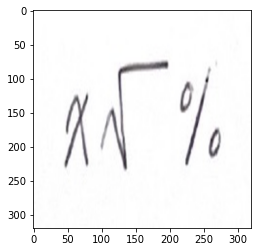

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Number of predictions:  0 Prediction:  


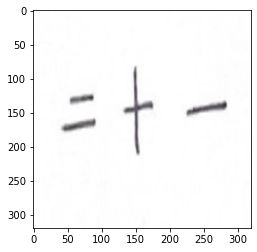

   xmin     ymin   xmax        ymax  confidence  class       name
0   0.0  2.76889  320.0  312.238159    0.700714      2  plus sign
Number of predictions:  1 Prediction:  2


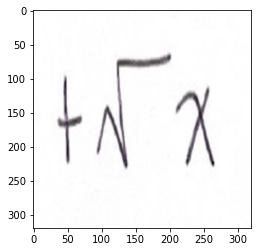

       xmin      ymin   xmax       ymax  confidence  class name
0  3.882462  3.012863  320.0  316.86499    0.295623      0    x
Number of predictions:  1 Prediction:  0


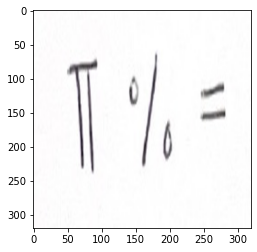

       xmin      ymin        xmax        ymax  confidence  class     name
0  0.906677  1.025314  319.766968  310.614929    0.365036      5  percent
Number of predictions:  1 Prediction:  5


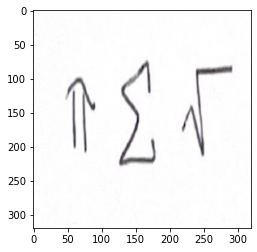

         xmin       ymin        xmax        ymax  confidence  class  \
1    0.282806   1.070755  299.496307  310.164307    0.260175      9   
0  176.034332  15.503571  320.000000  288.826263    0.391192      1   

          name  
1    summation  
0  square root  
Number of predictions:  2 Prediction:  91


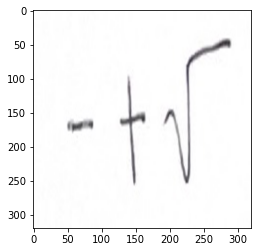

       xmin      ymin   xmax        ymax  confidence  class     name
1  0.000000  0.970688  320.0  318.076843    0.274394      8       pi
0  0.342255  1.072342  320.0  317.895874    0.318088      7  product
Number of predictions:  2 Prediction:  87


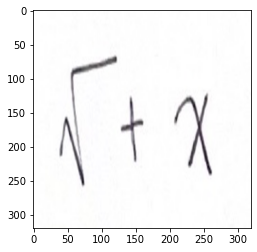

       xmin  ymin   xmax        ymax  confidence  class name
0  4.504349   0.0  320.0  314.705505    0.577007      0    x
Number of predictions:  1 Prediction:  0


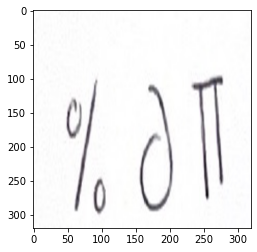

       xmin        ymin        xmax        ymax  confidence  class     name
0  0.342941   25.207413  309.299683  317.715271    0.331574      5  percent
1  1.327118  100.097183  174.832031  318.786133    0.291550      5  percent
Number of predictions:  2 Prediction:  55


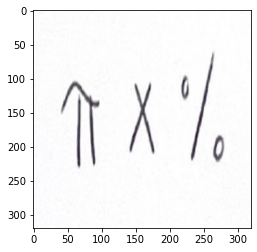

       xmin  ymin        xmax        ymax  confidence  class name
0  0.747086   0.0  319.272583  311.846802    0.611016      0    x
Number of predictions:  1 Prediction:  0


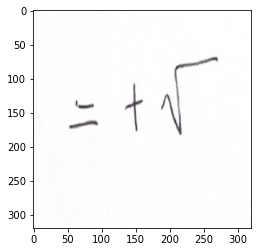

   xmin      ymin        xmax        ymax  confidence  class name
0   0.0  0.686157  317.774597  307.502472    0.443467      8   pi
Number of predictions:  1 Prediction:  8


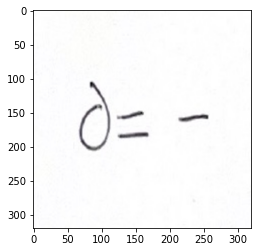

       xmin  ymin        xmax        ymax  confidence  class     name
0  0.011795   0.0  318.785217  316.133057    0.534073      6  partial
Number of predictions:  1 Prediction:  6


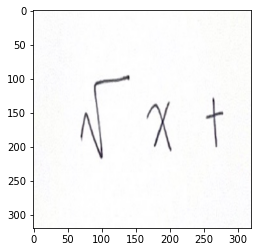

   xmin  ymin   xmax        ymax  confidence  class name
0   0.0   0.0  320.0  314.822571    0.746877      0    x
Number of predictions:  1 Prediction:  0


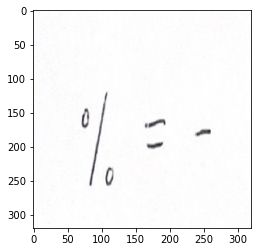

       xmin      ymin   xmax        ymax  confidence  class     name
0  0.000000  0.000000  320.0  318.253052    0.446652      4    equal
1  0.207565  7.331253  320.0  320.000000    0.297282      5  percent
Number of predictions:  2 Prediction:  45


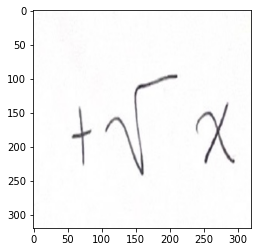

       xmin  ymin        xmax        ymax  confidence  class         name
0  1.394379   0.0  311.885345  313.689941    0.441799      1  square root
Number of predictions:  1 Prediction:  1


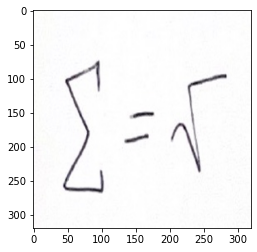

       xmin       ymin       xmax        ymax  confidence  class       name
1  0.433281  15.366867  142.62146  312.403503    0.346523      9  summation
0  6.938644   0.103287  320.00000  315.185730    0.444705      8         pi
Number of predictions:  2 Prediction:  98


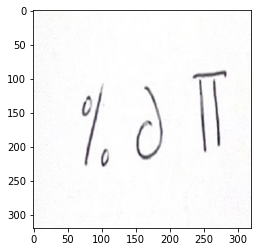

   xmin  ymin        xmax        ymax  confidence  class     name
0   0.0   0.0  306.407104  309.760468    0.470693      5  percent
Number of predictions:  1 Prediction:  5


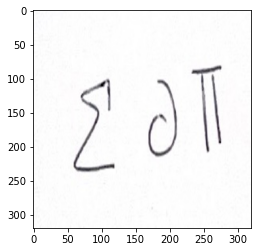

         xmin  ymin        xmax        ymax  confidence  class name
0  143.368866   0.0  319.595032  296.758667    0.405556      8   pi
Number of predictions:  1 Prediction:  8


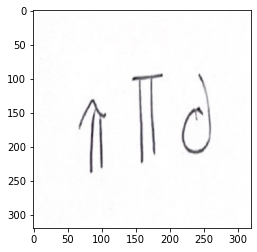

       xmin  ymin        xmax        ymax  confidence  class name
0  0.060364   0.0  319.082764  313.588379    0.809165      8   pi
Number of predictions:  1 Prediction:  8


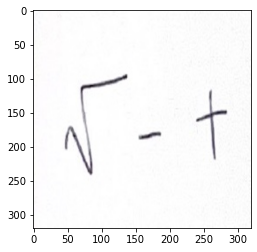

         xmin      ymin        xmax        ymax  confidence  class  \
0    0.000000  0.534744  199.099335  311.872498    0.547743      1   
1  159.927811  0.000000  320.000000  312.740967    0.469020      2   

          name  
0  square root  
1    plus sign  
Number of predictions:  2 Prediction:  12


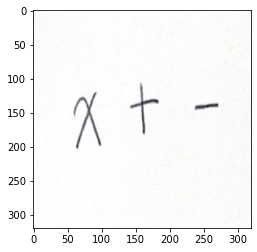

      xmin  ymin   xmax        ymax  confidence  class       name
0  0.00000   0.0  320.0  316.084839    0.783731      2  plus sign
1  0.24617   0.0  320.0  316.243958    0.648203      0          x
Number of predictions:  2 Prediction:  20


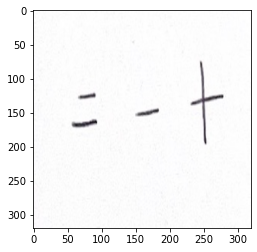

   xmin      ymin   xmax       ymax  confidence  class       name
0   0.0  1.757629  320.0  318.30484    0.548921      2  plus sign
Number of predictions:  1 Prediction:  2


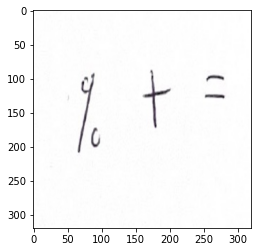

         xmin  ymin       xmax        ymax  confidence  class   name
0  141.378662   0.0  315.88269  211.556519    0.371343      4  equal
Number of predictions:  1 Prediction:  4


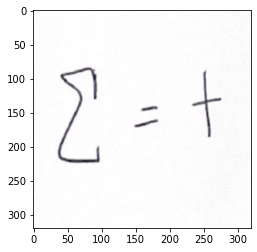

        xmin       ymin        xmax        ymax  confidence  class       name
0   0.268486  25.373337  144.586334  277.942566    0.288763      9  summation
1  30.212265   1.585709  320.000000  308.893494    0.257222      8         pi
Number of predictions:  2 Prediction:  98


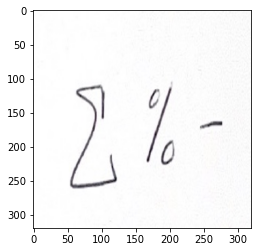

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  1.415329  320.0  316.887329    0.634606      5  percent
Number of predictions:  1 Prediction:  5


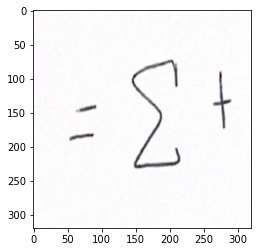

       xmin      ymin        xmax        ymax  confidence  class       name
0  3.900345  1.622253  317.345154  315.281372    0.729698      9  summation
Number of predictions:  1 Prediction:  9


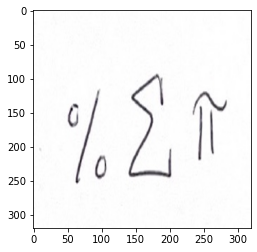

       xmin      ymin        xmax        ymax  confidence  class     name
0  0.000000  0.000000  320.000000  316.269287    0.635809      8       pi
1  1.297165  1.512268  319.058899  313.314758    0.515662      5  percent
Number of predictions:  2 Prediction:  85


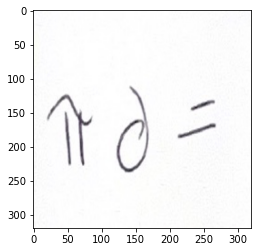

         xmin       ymin       xmax        ymax  confidence  class   name
0  180.387909  23.510681  318.80365  282.581207    0.285606      4  equal
Number of predictions:  1 Prediction:  4


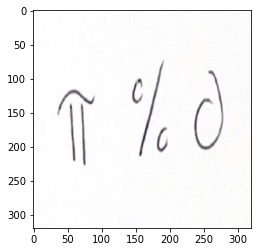

       xmin  ymin        xmax        ymax  confidence  class     name
0  8.189178   0.0  319.950104  310.185791    0.459098      5  percent
Number of predictions:  1 Prediction:  5


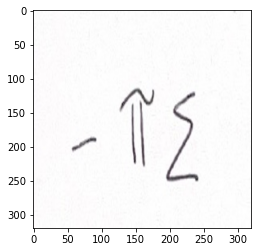

       xmin  ymin   xmax        ymax  confidence  class name
0  0.030304   0.0  320.0  319.072906    0.886363      8   pi
Number of predictions:  1 Prediction:  8


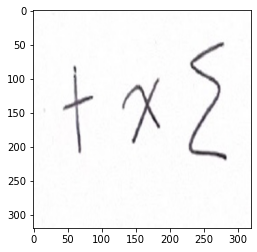

   xmin  ymin   xmax        ymax  confidence  class name
0   0.0   0.0  320.0  314.586761    0.823044      0    x
Number of predictions:  1 Prediction:  0


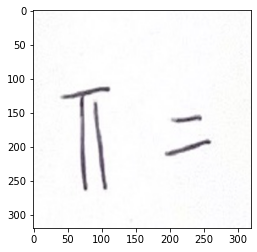

       xmin      ymin   xmax        ymax  confidence  class name
0  0.261887  0.619766  320.0  316.963257    0.589633      8   pi
Number of predictions:  1 Prediction:  8


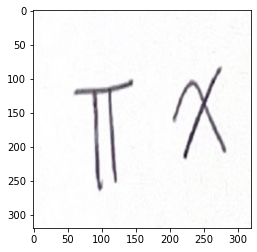

         xmin      ymin        xmax        ymax  confidence  class     name
1    0.000000  1.125488  203.682861  315.063599    0.385220      7  product
0  162.954834  0.063339  320.000000  309.730103    0.394654      0        x
Number of predictions:  2 Prediction:  70


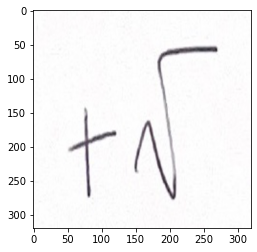

   xmin      ymin        xmax        ymax  confidence  class         name
0   0.0  0.617828  319.666748  319.428406    0.498879      1  square root
Number of predictions:  1 Prediction:  1


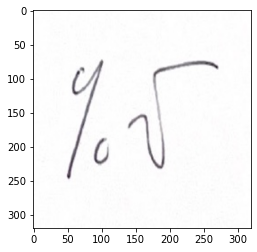

   xmin  ymin   xmax        ymax  confidence  class     name
0   0.0   0.0  320.0  318.436707    0.901005      5  percent
Number of predictions:  1 Prediction:  5


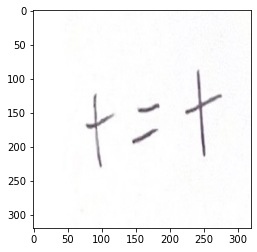

   xmin      ymin   xmax        ymax  confidence  class name
0   0.0  1.129028  320.0  318.066467    0.736739      8   pi
Number of predictions:  1 Prediction:  8


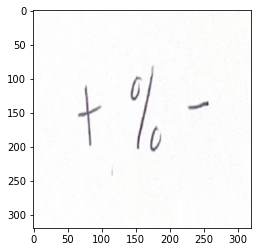

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.040649  320.0  319.015198    0.851186      5  percent
Number of predictions:  1 Prediction:  5


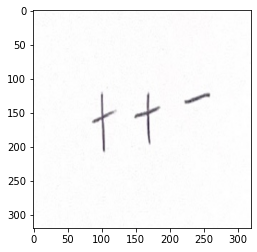

   xmin      ymin   xmax   ymax  confidence  class       name
0   0.0  0.741364  320.0  320.0    0.917507      2  plus sign
Number of predictions:  1 Prediction:  2


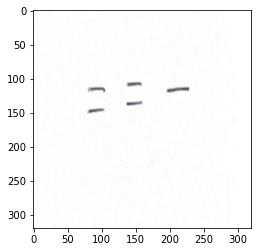

   xmin      ymin       xmax        ymax  confidence  class   name
0   0.0  1.184464  317.37677  318.169861    0.925014      4  equal
Number of predictions:  1 Prediction:  4


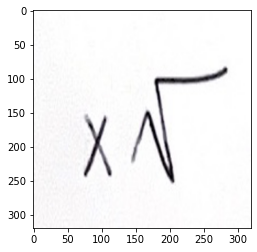

       xmin  ymin        xmax        ymax  confidence  class name
0  0.439804   0.0  319.705444  318.174561    0.740039      0    x
Number of predictions:  1 Prediction:  0


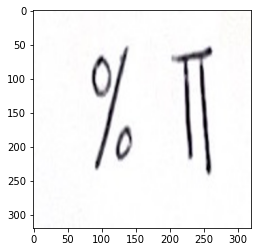

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.220657  320.0  315.815857    0.682602      5  percent
Number of predictions:  1 Prediction:  5


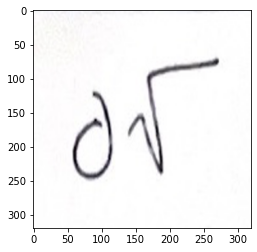

   xmin  ymin        xmax        ymax  confidence  class         name
0   0.0   0.0  319.964355  317.056519    0.613842      1  square root
1   0.0   0.0  319.427246  316.641418    0.476753      5      percent
Number of predictions:  2 Prediction:  15


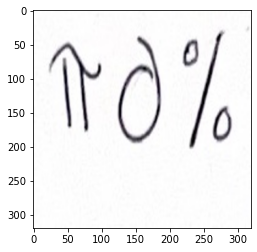

         xmin      ymin        xmax        ymax  confidence  class     name
0  165.305237  0.077934  319.419891  209.956238    0.339108      5  percent
Number of predictions:  1 Prediction:  5


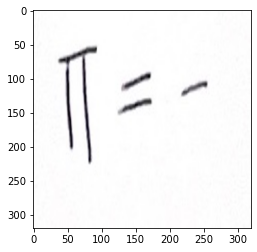

   xmin      ymin   xmax        ymax  confidence  class   name
0   0.0  1.638947  320.0  315.994476    0.804686      4  equal
Number of predictions:  1 Prediction:  4


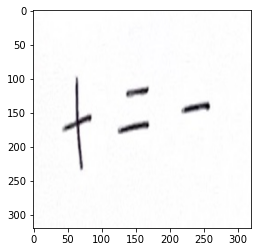

       xmin      ymin   xmax        ymax  confidence  class   name
0  0.000000  2.090439  320.0  316.973267    0.661227      4  equal
1  0.071777  1.996262  320.0  317.062500    0.265633      8     pi
Number of predictions:  2 Prediction:  48


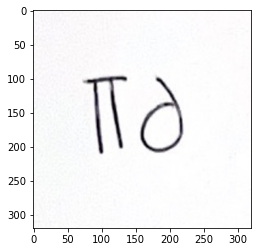

   xmin      ymin        xmax        ymax  confidence  class     name
0   0.0  0.448700  319.808228  320.000000    0.553505      8       pi
1   0.0  0.312225  319.138336  319.909241    0.368806      6  partial
Number of predictions:  2 Prediction:  86


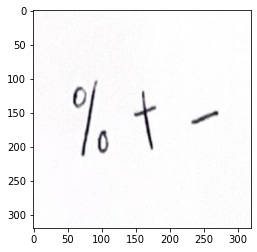

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.219238  320.0  319.139069    0.862392      2  plus sign
Number of predictions:  1 Prediction:  2


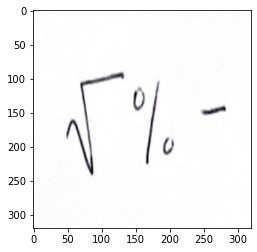

   xmin  ymin   xmax        ymax  confidence  class     name
0   0.0   0.0  320.0  314.453308    0.741286      5  percent
Number of predictions:  1 Prediction:  5


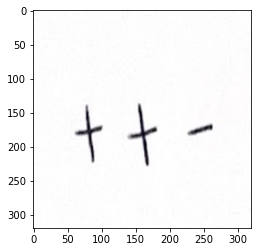

       xmin      ymin   xmax   ymax  confidence  class       name
0  0.028519  0.194672  320.0  320.0    0.942677      2  plus sign
Number of predictions:  1 Prediction:  2


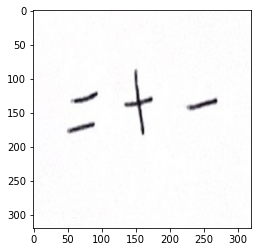

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.451736  320.0  319.153259    0.839742      2  plus sign
Number of predictions:  1 Prediction:  2


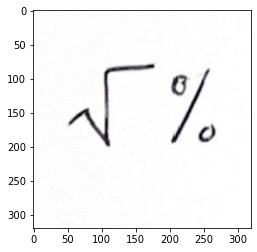

       xmin  ymin   xmax        ymax  confidence  class     name
0  1.215973   0.0  320.0  305.906189    0.617374      5  percent
Number of predictions:  1 Prediction:  5


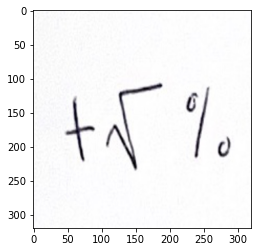

       xmin  ymin   xmax        ymax  confidence  class     name
0  3.439209   0.0  320.0  313.170227    0.405438      5  percent
Number of predictions:  1 Prediction:  5


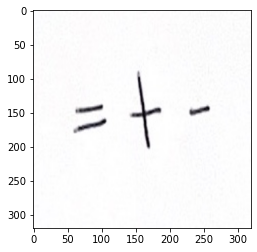

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.077698  320.0  319.862671    0.847783      2  plus sign
Number of predictions:  1 Prediction:  2


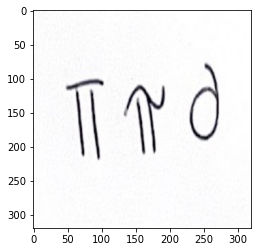

       xmin  ymin   xmax       ymax  confidence  class name
0  0.407822   0.0  320.0  316.57135    0.800812      8   pi
Number of predictions:  1 Prediction:  8


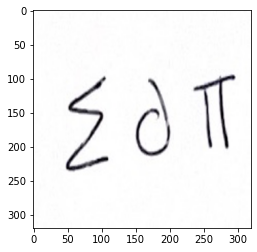

         xmin      ymin   xmax        ymax  confidence  class name
0  170.863525  2.174606  320.0  299.166321    0.277364      8   pi
Number of predictions:  1 Prediction:  8


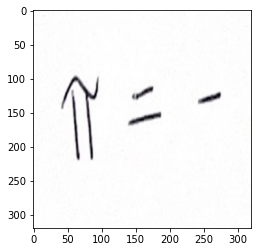

   xmin      ymin        xmax        ymax  confidence  class   name
0   0.0  0.896805  319.260956  312.200317    0.709588      8     pi
1   0.0  2.763199  320.000000  309.979675    0.447435      4  equal
Number of predictions:  2 Prediction:  84


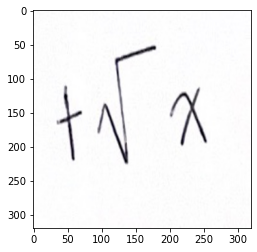

       xmin  ymin   xmax        ymax  confidence  class name
0  9.462433   0.0  320.0  301.727783    0.530003      0    x
Number of predictions:  1 Prediction:  0


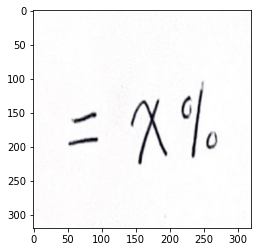

       xmin  ymin        xmax        ymax  confidence  class name
0  2.502441   0.0  316.223724  303.766174    0.489043      0    x
Number of predictions:  1 Prediction:  0


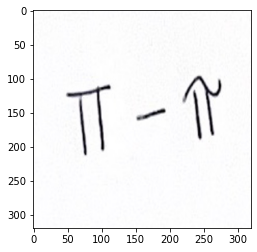

   xmin      ymin   xmax       ymax  confidence  class name
0   0.0  0.171661  320.0  317.55719    0.697031      8   pi
Number of predictions:  1 Prediction:  8


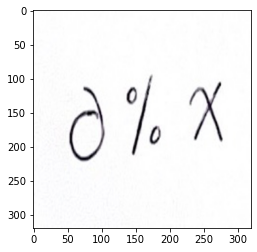

   xmin  ymin   xmax        ymax  confidence  class     name
0   0.0   0.0  320.0  312.186157    0.668285      5  percent
Number of predictions:  1 Prediction:  5


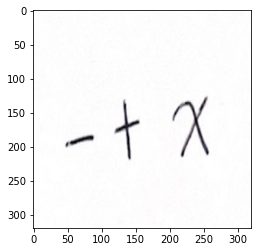

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.000000  320.0  318.485992    0.856972      0          x
1   0.0  1.450104  320.0  319.145233    0.260160      2  plus sign
Number of predictions:  2 Prediction:  02


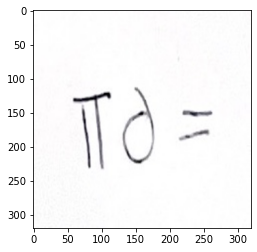

   xmin  ymin        xmax        ymax  confidence  class name
0   0.0   0.0  307.695801  315.650208    0.337575      8   pi
Number of predictions:  1 Prediction:  8


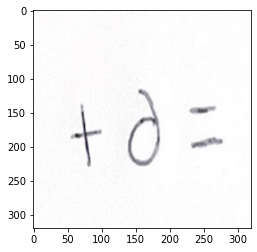

       xmin  ymin   xmax        ymax  confidence  class     name
0  1.441071   0.0  320.0  309.964478     0.37703      6  partial
Number of predictions:  1 Prediction:  6


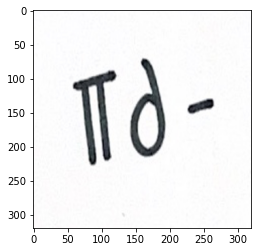

       xmin  ymin        xmax        ymax  confidence  class name
0  0.550613   0.0  319.686157  319.235687    0.761163      8   pi
Number of predictions:  1 Prediction:  8


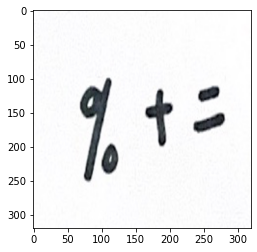

   xmin      ymin        xmax        ymax  confidence  class       name
0   0.0  0.750519  319.643829  317.286407    0.644492      2  plus sign
1   0.0  0.379349  320.000000  318.672058    0.282303      5    percent
Number of predictions:  2 Prediction:  25


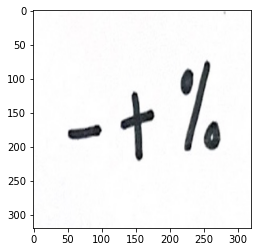

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.587036  320.0  316.975769    0.861223      2  plus sign
1   0.0  0.245895  320.0  318.176514    0.534532      5    percent
Number of predictions:  2 Prediction:  25


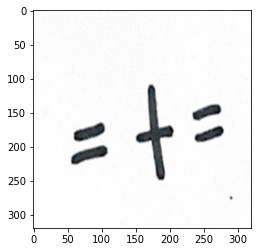

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Number of predictions:  0 Prediction:  


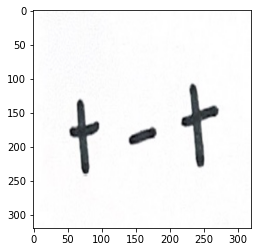

      xmin      ymin   xmax        ymax  confidence  class       name
0  0.16217  0.482666  320.0  319.868347     0.93635      2  plus sign
Number of predictions:  1 Prediction:  2


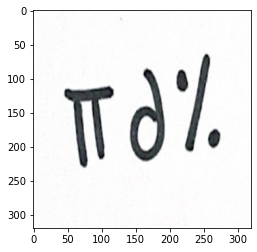

   xmin  ymin        xmax   ymax  confidence  class     name
0   0.0   0.0  319.942688  320.0    0.849874      5  percent
Number of predictions:  1 Prediction:  5


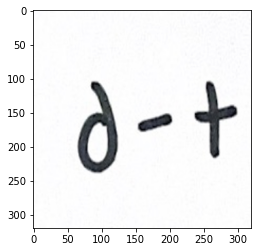

   xmin     ymin   xmax        ymax  confidence  class       name
0   0.0  0.12088  320.0  319.462982    0.684954      2  plus sign
Number of predictions:  1 Prediction:  2


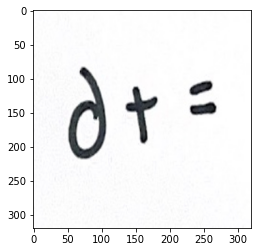

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Number of predictions:  0 Prediction:  


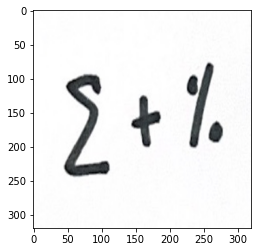

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.457962  320.0  315.615112    0.766753      2  plus sign
Number of predictions:  1 Prediction:  2


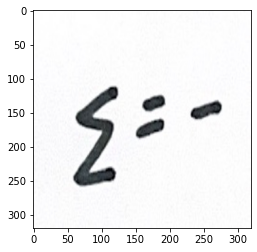

       xmin      ymin        xmax        ymax  confidence  class     name
1  0.000000  0.616989  319.592773  317.676086    0.343046      4    equal
0  0.728348  0.664566  320.000000  317.409119    0.349145      5  percent
Number of predictions:  2 Prediction:  45


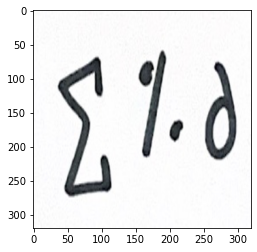

         xmin      ymin        xmax        ymax  confidence  class       name
0    0.000000  1.447845  157.166779  315.476013    0.671465      9  summation
1  142.884491  1.287155  320.000000  306.874451    0.263168      5    percent
Number of predictions:  2 Prediction:  95


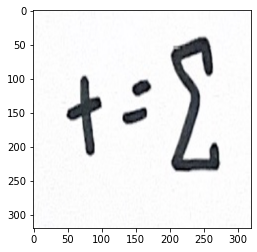

   xmin     ymin        xmax   ymax  confidence  class     name
0   0.0  1.34668  319.672241  320.0    0.342754      5  percent
Number of predictions:  1 Prediction:  5


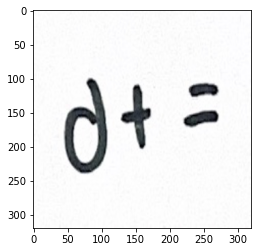

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  2.317017  320.0  313.203003    0.400735      2  plus sign
Number of predictions:  1 Prediction:  2


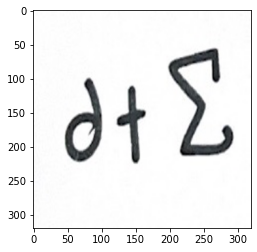

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.982224  320.0  313.698181    0.459000      5    percent
1   0.0  0.273834  320.0  314.255371    0.341059      9  summation
Number of predictions:  2 Prediction:  59


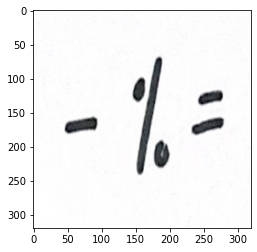

       xmin      ymin   xmax        ymax  confidence  class     name
0  8.376663  0.904846  320.0  314.712921    0.582294      5  percent
Number of predictions:  1 Prediction:  5


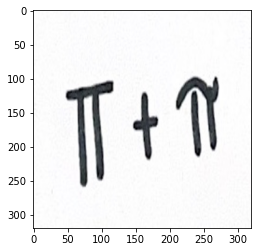

   xmin      ymin   xmax        ymax  confidence  class name
0   0.0  0.000397  320.0  317.761047    0.764572      8   pi
Number of predictions:  1 Prediction:  8


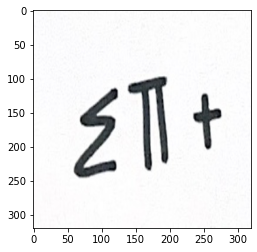

      xmin     ymin   xmax        ymax  confidence  class name
0  0.01799  0.89534  320.0  317.211365    0.532872      8   pi
Number of predictions:  1 Prediction:  8


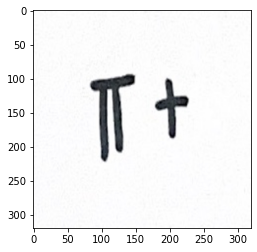

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.473282  320.0  319.707703    0.527166      7  product
Number of predictions:  1 Prediction:  7


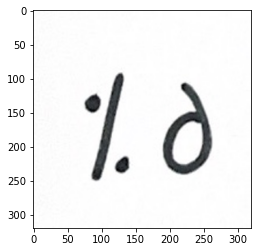

       xmin  ymin   xmax        ymax  confidence  class     name
0  0.118149   0.0  320.0  316.627686    0.796527      5  percent
Number of predictions:  1 Prediction:  5


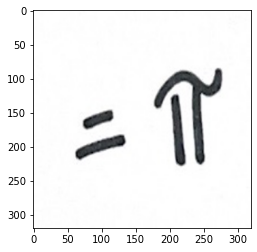

   xmin      ymin        xmax        ymax  confidence  class name
0   0.0  0.771988  319.387634  313.621094    0.546211      8   pi
Number of predictions:  1 Prediction:  8


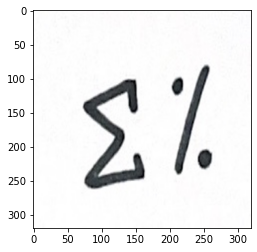

       xmin      ymin   xmax        ymax  confidence  class       name
0  0.000000  0.899857  320.0  317.707458    0.653316      9  summation
1  0.802109  0.221054  320.0  319.691284    0.563349      5    percent
Number of predictions:  2 Prediction:  95


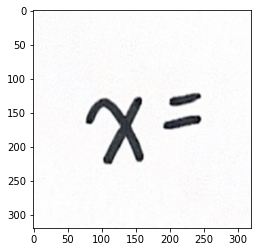

       xmin  ymin   xmax        ymax  confidence  class name
0  0.291977   0.0  320.0  315.049316    0.816311      0    x
Number of predictions:  1 Prediction:  0


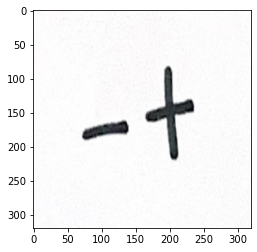

   xmin      ymin   xmax   ymax  confidence  class       name
0   0.0  0.962234  320.0  320.0    0.943702      2  plus sign
Number of predictions:  1 Prediction:  2


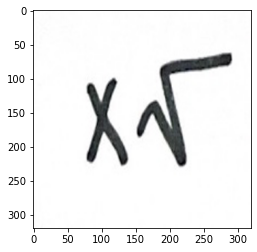

      xmin  ymin   xmax        ymax  confidence  class name
0  0.14679   0.0  320.0  313.986938     0.72214      0    x
Number of predictions:  1 Prediction:  0


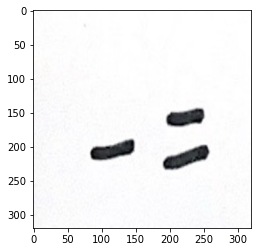

       xmin     ymin        xmax   ymax  confidence  class   name
0  0.388718  0.44017  319.750854  320.0    0.835094      4  equal
Number of predictions:  1 Prediction:  4


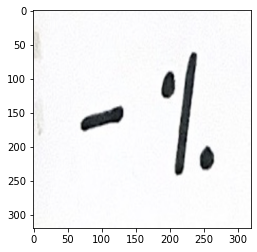

       xmin      ymin        xmax       ymax  confidence  class           name
1  1.792557  0.404831  320.000000  319.99353    0.504020      3  negative sign
0  1.805923  0.185089  319.393738  320.00000    0.790286      5        percent
Number of predictions:  2 Prediction:  35


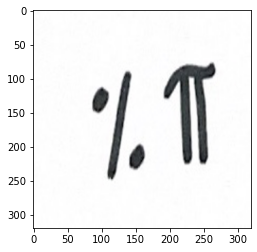

   xmin  ymin        xmax        ymax  confidence  class     name
0   0.0   0.0  320.000000  318.799286    0.803878      5  percent
1   0.0   0.0  318.815155  319.806519    0.624061      8       pi
Number of predictions:  2 Prediction:  58


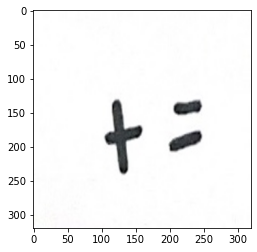

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.258301  320.0  318.474426    0.655288      2  plus sign
Number of predictions:  1 Prediction:  2


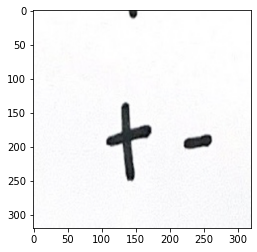

       xmin  ymin        xmax        ymax  confidence  class       name
0  0.084457   0.0  320.000000  318.941467    0.735482      2  plus sign
1  1.189926   0.0  309.776123   73.627892    0.306370      2  plus sign
Number of predictions:  2 Prediction:  22


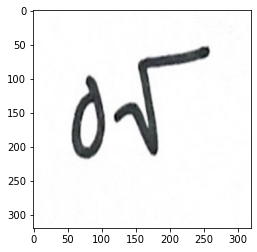

   xmin  ymin        xmax       ymax  confidence  class         name
0   0.0   0.0  319.395447  316.52417    0.770245      1  square root
Number of predictions:  1 Prediction:  1


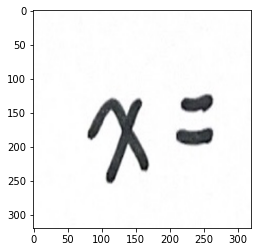

   xmin  ymin        xmax        ymax  confidence  class name
0   0.0   0.0  319.502533  313.988342    0.799724      0    x
Number of predictions:  1 Prediction:  0


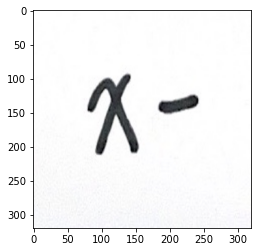

   xmin  ymin   xmax       ymax  confidence  class name
0   0.0   0.0  320.0  318.65918    0.902534      0    x
Number of predictions:  1 Prediction:  0


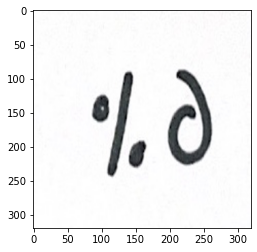

   xmin  ymin   xmax        ymax  confidence  class     name
0   0.0   0.0  320.0  318.744598    0.880826      5  percent
Number of predictions:  1 Prediction:  5


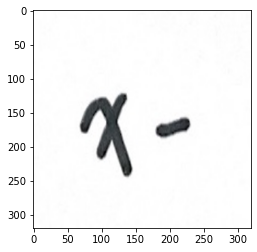

      xmin  ymin   xmax        ymax  confidence  class name
0  0.26329   0.0  320.0  318.035645    0.865741      0    x
Number of predictions:  1 Prediction:  0


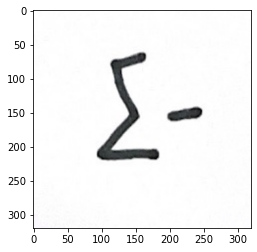

   xmin      ymin        xmax   ymax  confidence  class       name
0   0.0  0.291077  319.098083  320.0    0.923412      9  summation
Number of predictions:  1 Prediction:  9


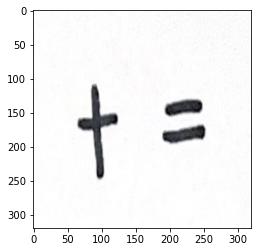

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.336929  320.0  318.090210    0.428362      2  plus sign
1   0.0  1.173767  320.0  319.054504    0.336618      4      equal
Number of predictions:  2 Prediction:  24


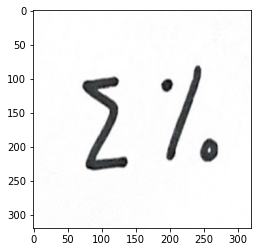

       xmin  ymin   xmax        ymax  confidence  class     name
0  3.210068   0.0  320.0  318.051208    0.484424      5  percent
Number of predictions:  1 Prediction:  5


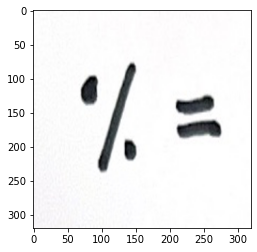

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.872772  320.0  315.819672    0.756684      5  percent
1   0.0  0.543335  320.0  317.678070    0.454163      4    equal
Number of predictions:  2 Prediction:  54


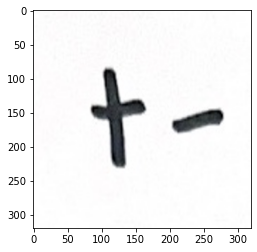

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.731628  320.0  317.756714    0.938144      2  plus sign
Number of predictions:  1 Prediction:  2


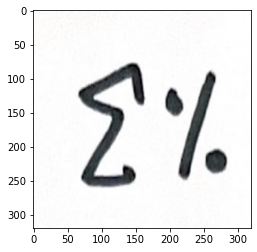

   xmin  ymin        xmax        ymax  confidence  class       name
0   0.0   0.0  314.094513  319.255981    0.602476      9  summation
Number of predictions:  1 Prediction:  9


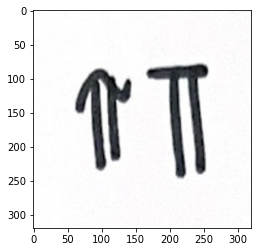

   xmin      ymin   xmax        ymax  confidence  class name
0   0.0  0.297714  320.0  317.998047    0.915851      8   pi
Number of predictions:  1 Prediction:  8


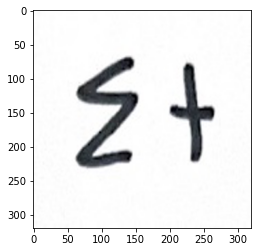

       xmin      ymin   xmax        ymax  confidence  class       name
1  0.000000  1.192078  320.0  315.832642    0.511127      9  summation
0  4.374695  0.442032  320.0  318.807495    0.678863      2  plus sign
Number of predictions:  2 Prediction:  92


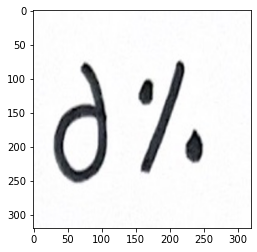

      xmin  ymin   xmax        ymax  confidence  class     name
0  1.80658   0.0  320.0  318.594971    0.835834      5  percent
Number of predictions:  1 Prediction:  5


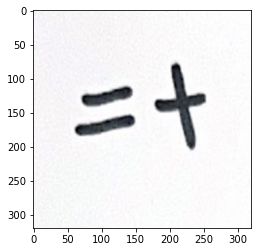

       xmin      ymin   xmax        ymax  confidence  class name
0  0.474487  1.379623  320.0  318.074707    0.617577      8   pi
Number of predictions:  1 Prediction:  8


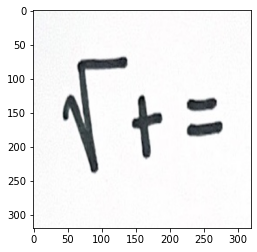

       xmin      ymin   xmax        ymax  confidence  class     name
1  0.000000  0.864761  320.0  314.925659    0.331093      8       pi
0  0.747818  0.941025  320.0  314.430420    0.360483      7  product
Number of predictions:  2 Prediction:  87


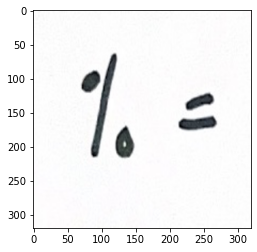

   xmin      ymin        xmax        ymax  confidence  class     name
0   0.0  0.042267  318.798035  313.426392    0.559284      5  percent
Number of predictions:  1 Prediction:  5


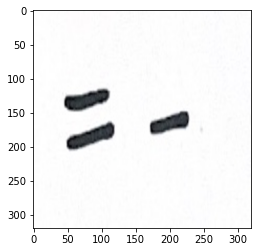

       xmin      ymin   xmax        ymax  confidence  class   name
0  1.570755  0.981812  320.0  319.608948    0.860074      4  equal
Number of predictions:  1 Prediction:  4


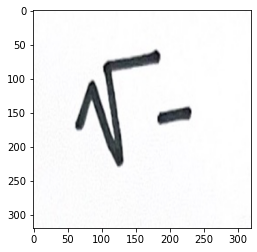

       xmin     ymin        xmax        ymax  confidence  class         name
0  0.000473  0.60614  319.517273  318.418457    0.684859      1  square root
Number of predictions:  1 Prediction:  1


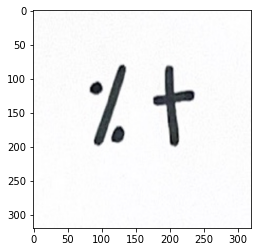

       xmin      ymin   xmax   ymax  confidence  class       name
0  0.181137  0.562271  320.0  320.0    0.835614      2  plus sign
Number of predictions:  1 Prediction:  2


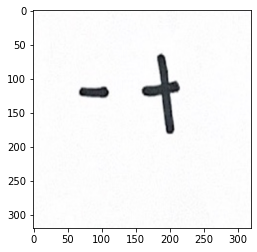

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.881348  320.0  318.592834    0.919579      2  plus sign
Number of predictions:  1 Prediction:  2


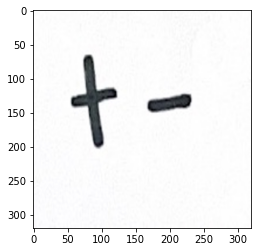

       xmin      ymin   xmax       ymax  confidence  class       name
0  0.430237  0.802307  320.0  319.39743     0.86184      2  plus sign
Number of predictions:  1 Prediction:  2


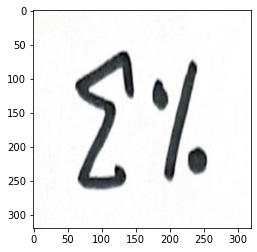

       xmin      ymin        xmax        ymax  confidence  class       name
1  0.129410  0.644958  320.000000  317.923615    0.443793      9  summation
0  0.188629  0.556473  319.932983  318.446228    0.776241      5    percent
Number of predictions:  2 Prediction:  95


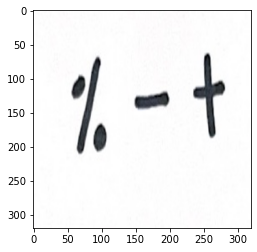

       xmin      ymin   xmax        ymax  confidence  class       name
0  0.000000  0.659073  320.0  319.144409    0.826052      2  plus sign
1  0.182739  0.426468  320.0  317.350830    0.674374      5    percent
Number of predictions:  2 Prediction:  25


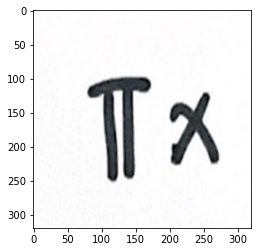

       xmin      ymin   xmax        ymax  confidence  class name
1  0.509583  0.109009  320.0  315.280334    0.517356      8   pi
0  1.565765  0.000000  320.0  316.692444    0.764420      0    x
Number of predictions:  2 Prediction:  80


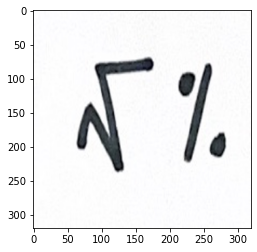

       xmin      ymin        xmax        ymax  confidence  class         name
0  0.212708  0.065338  220.054153  315.168732    0.292567      1  square root
Number of predictions:  1 Prediction:  1


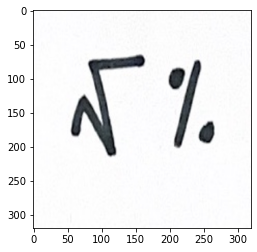

       xmin  ymin   xmax        ymax  confidence  class     name
0  2.745895   0.0  320.0  315.578918    0.663041      5  percent
Number of predictions:  1 Prediction:  5


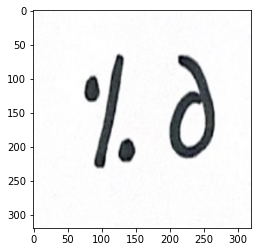

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.208755  320.0  319.009216    0.895859      5  percent
Number of predictions:  1 Prediction:  5


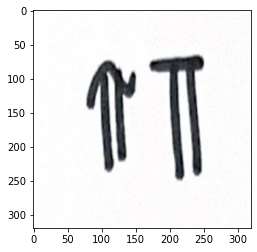

       xmin      ymin   xmax        ymax  confidence  class name
0  0.044434  0.418793  320.0  318.045319    0.912797      8   pi
Number of predictions:  1 Prediction:  8


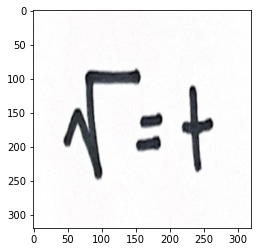

   xmin      ymin        xmax        ymax  confidence  class name
0   0.0  1.200745  319.178833  316.902069    0.567834      8   pi
Number of predictions:  1 Prediction:  8


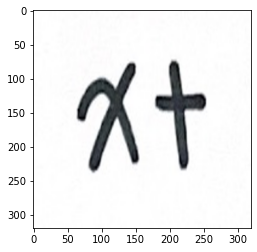

   xmin  ymin   xmax        ymax  confidence  class name
0   0.0   0.0  320.0  317.507233    0.844392      0    x
Number of predictions:  1 Prediction:  0


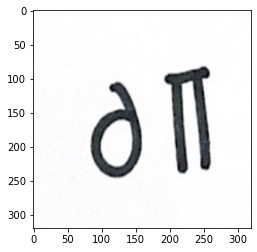

       xmin  ymin        xmax        ymax  confidence  class     name
1  0.000000   0.0  318.708618  316.807465    0.331534      8       pi
0  0.390793   0.0  320.000000  317.191223    0.366436      6  partial
Number of predictions:  2 Prediction:  86


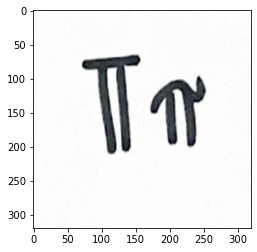

   xmin      ymin   xmax   ymax  confidence  class name
0   0.0  0.837723  320.0  320.0    0.895115      8   pi
Number of predictions:  1 Prediction:  8


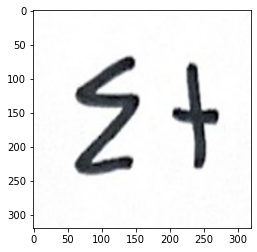

       xmin      ymin        xmax        ymax  confidence  class       name
0  0.000000  0.887131  317.778625  315.694763    0.557910      9  summation
1  6.138229  0.332275  320.000000  318.672729    0.408009      2  plus sign
Number of predictions:  2 Prediction:  92


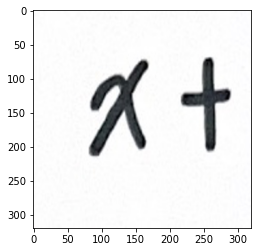

   xmin      ymin   xmax        ymax  confidence  class name
0   0.0  0.488586  320.0  317.048187    0.853563      0    x
Number of predictions:  1 Prediction:  0


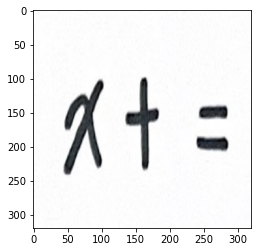

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.487152  320.0  314.329865    0.704946      2  plus sign
Number of predictions:  1 Prediction:  2


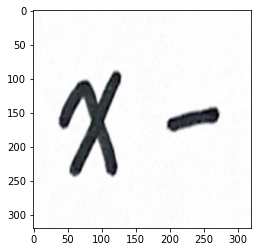

   xmin  ymin        xmax        ymax  confidence  class name
0   0.0   0.0  319.052521  317.100891    0.754326      0    x
Number of predictions:  1 Prediction:  0


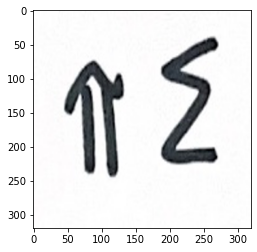

       xmin     ymin        xmax        ymax  confidence  class name
0  0.752289  0.42424  314.646515  314.727844    0.702143      8   pi
Number of predictions:  1 Prediction:  8


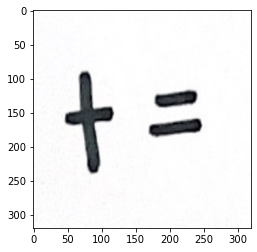

   xmin      ymin   xmax        ymax  confidence  class   name
0   0.0  2.272446  320.0  312.742493    0.288714      4  equal
Number of predictions:  1 Prediction:  4


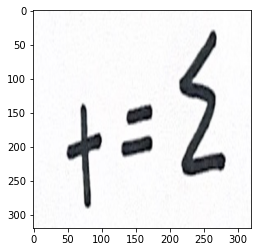

       xmin      ymin        xmax        ymax  confidence  class   name
1  0.000000  1.531921  319.641113  318.660889    0.340948      8     pi
0  0.156509  1.559875  320.000000  318.349182    0.399261      4  equal
Number of predictions:  2 Prediction:  84


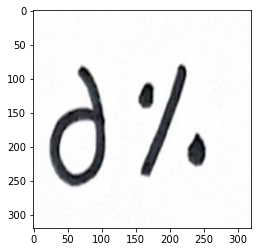

       xmin  ymin   xmax        ymax  confidence  class     name
0  3.859177   0.0  320.0  318.701782    0.804954      5  percent
Number of predictions:  1 Prediction:  5


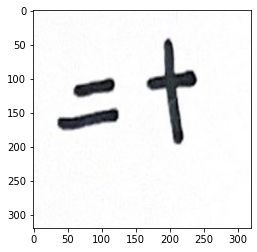

   xmin      ymin   xmax       ymax  confidence  class       name
0   0.0  2.044006  320.0  318.11261    0.829091      2  plus sign
Number of predictions:  1 Prediction:  2


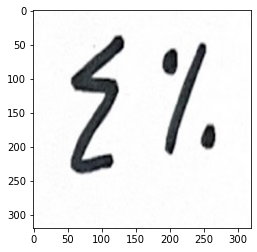

   xmin      ymin   xmax   ymax  confidence  class     name
0   0.0  0.725494  320.0  320.0     0.82099      5  percent
Number of predictions:  1 Prediction:  5


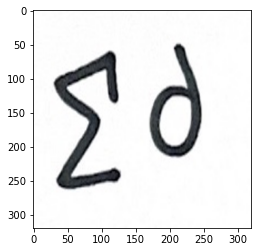

       xmin      ymin        xmax   ymax  confidence  class       name
0  0.846909  0.757416  318.318848  320.0    0.626945      9  summation
Number of predictions:  1 Prediction:  9


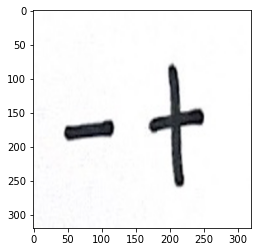

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.107651  320.0  319.691772    0.894117      2  plus sign
Number of predictions:  1 Prediction:  2


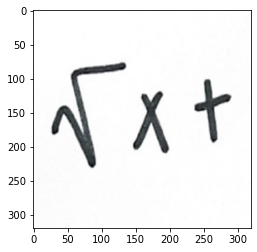

   xmin      ymin        xmax        ymax  confidence  class name
0   0.0  0.638794  319.924438  308.685944    0.627264      0    x
Number of predictions:  1 Prediction:  0


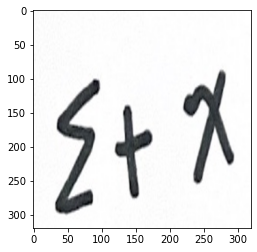

       xmin     ymin   xmax        ymax  confidence  class name
0  9.844711  0.21344  320.0  317.034485    0.359567      0    x
Number of predictions:  1 Prediction:  0


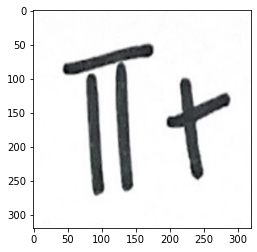

       xmin      ymin   xmax   ymax  confidence  class     name
0  0.237717  0.827164  320.0  320.0    0.636965      7  product
Number of predictions:  1 Prediction:  7


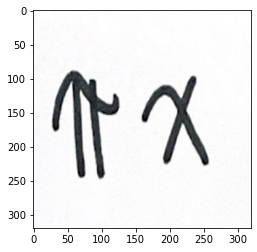

       xmin  ymin   xmax        ymax  confidence  class name
0  0.893356   0.0  320.0  316.010986    0.781426      0    x
1  1.979736   0.0  320.0  314.975525    0.647447      8   pi
Number of predictions:  2 Prediction:  08


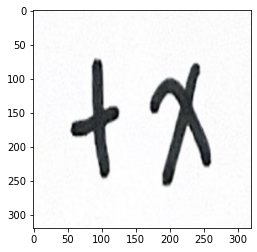

   xmin      ymin   xmax        ymax  confidence  class name
0   0.0  0.100571  320.0  318.658936    0.774876      0    x
Number of predictions:  1 Prediction:  0


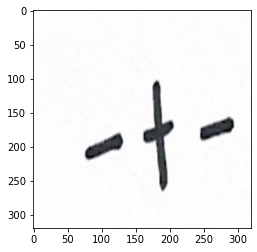

   xmin      ymin   xmax   ymax  confidence  class       name
0   0.0  0.680573  320.0  320.0    0.940483      2  plus sign
Number of predictions:  1 Prediction:  2


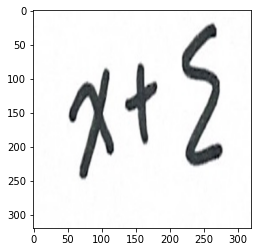

   xmin      ymin        xmax        ymax  confidence  class name
0   0.0  0.283234  319.976013  316.367523    0.658754      0    x
1   0.0  0.669601  319.786560  317.726624    0.425821      8   pi
Number of predictions:  2 Prediction:  08


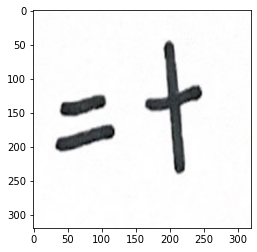

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  2.116364  320.0  317.451324    0.841445      2  plus sign
Number of predictions:  1 Prediction:  2


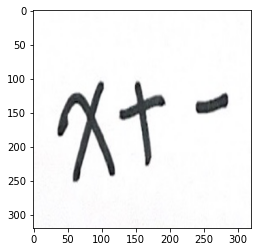

       xmin      ymin   xmax        ymax  confidence  class       name
0  0.000000  0.190613  320.0  317.912109    0.765965      2  plus sign
1  0.849533  0.279785  320.0  318.227783    0.661155      0          x
Number of predictions:  2 Prediction:  20


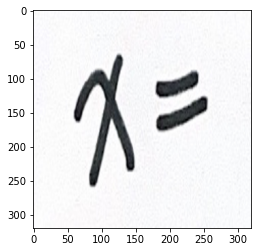

       xmin      ymin   xmax        ymax  confidence  class name
0  1.237671  1.367645  320.0  318.163391    0.712738      8   pi
Number of predictions:  1 Prediction:  8


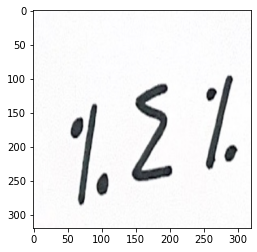

       xmin     ymin        xmax        ymax  confidence  class     name
0  1.277298  1.63472  311.793945  316.586731    0.271111      5  percent
Number of predictions:  1 Prediction:  5


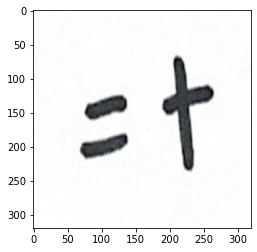

       xmin      ymin   xmax        ymax  confidence  class       name
0  0.000000  1.083633  320.0  319.757812    0.476983      2  plus sign
1  0.798752  1.057159  320.0  319.757843    0.422272      8         pi
Number of predictions:  2 Prediction:  28


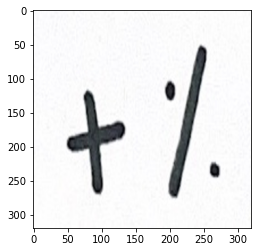

       xmin      ymin        xmax        ymax  confidence  class       name
0  0.000000  0.136139  319.801636  319.392792    0.887301      5    percent
1  0.768356  0.000000  320.000000  317.951294    0.385383      2  plus sign
Number of predictions:  2 Prediction:  52


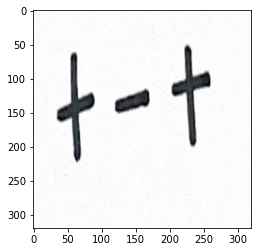

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.645798  320.0  319.781311    0.924042      2  plus sign
Number of predictions:  1 Prediction:  2


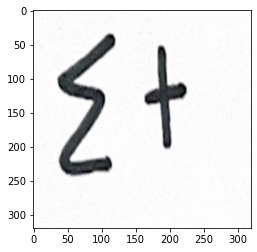

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  1.655518  320.0  319.915924    0.893167      2  plus sign
Number of predictions:  1 Prediction:  2


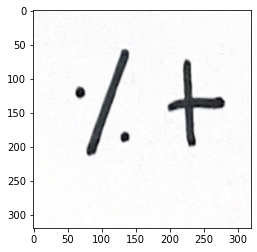

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.116348  320.0  318.561035    0.837012      5  percent
Number of predictions:  1 Prediction:  5


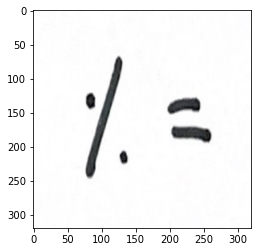

   xmin      ymin   xmax        ymax  confidence  class     name
0   0.0  0.610367  320.0  316.137939    0.660407      5  percent
Number of predictions:  1 Prediction:  5


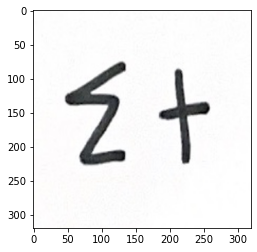

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  0.636276  320.0  318.150696    0.873262      2  plus sign
Number of predictions:  1 Prediction:  2


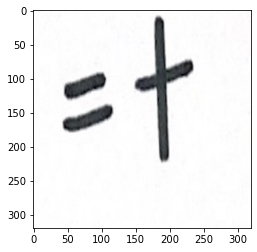

   xmin      ymin   xmax        ymax  confidence  class       name
0   0.0  2.393585  320.0  315.737854    0.838238      2  plus sign
Number of predictions:  1 Prediction:  2


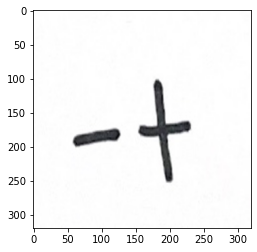

   xmin      ymin   xmax   ymax  confidence  class       name
0   0.0  0.500381  320.0  320.0    0.933408      2  plus sign
Number of predictions:  1 Prediction:  2


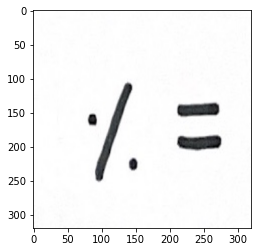

   xmin  ymin   xmax       ymax  confidence  class     name
0   0.0   0.0  320.0  315.45224    0.595719      5  percent
Number of predictions:  1 Prediction:  5


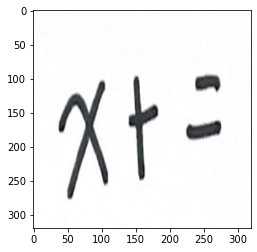

       xmin      ymin        xmax        ymax  confidence  class name
0  0.000000  1.109024  309.767944  315.102417    0.404212      0    x
1  0.487854  0.630966  319.041016  314.789246    0.282008      8   pi
Number of predictions:  2 Prediction:  08
Acc: 0.0000
Testing complete in 0m 21s


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [25]:
test_model(model_ft, dataset, labels)